# **UBER Data Analysis**

## Introduction

This project involved analyzing Uber ride data to identify patterns in trip frequency, distance, duration, and purpose. The dataset was cleaned by addressing missing and inconsistent values, and new features such as trip duration and monthly trends were generated. Descriptive statistics and visualizations were used to uncover key insights into user behavior, common ride purposes, and travel patterns—providing valuable inputs for understanding ride-sharing usage and identifying operational opportunities.

The analysis was performed using Python and popular libraries such as `pandas`, `Matplotlib` and `Seaborn`.

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np

Checking the `Pandas` Version

In [ ]:
pd.__version__

'2.2.2'

In [ ]:
# Loading the dataset

df = pd.read_csv('/content/UberDataset.csv')

In [ ]:
# Previewing the Data

df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [ ]:
# Understanding the Data Structure with `info()`

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
# Descriptive Statistics of the Data

df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
df.iloc[1155] # Checking for missing value in 1155th index

,1155
START_DATE,Totals
END_DATE,NaN
CATEGORY,NaN
START,NaN
STOP,NaN
MILES,12204.7
PURPOSE,NaN


In [ ]:
df = df.drop(index=1155) # Dropping the row with missing value

In [ ]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
df.describe() # Rechecking the descriptive statistics after dropping the row

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [ ]:
df.isnull().sum() # Checking for any remaining missing values in the dataset

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,502


The output shows that the PURPOSE column has **502** null values, while all other columns are complete.

In [ ]:
df.duplicated().sum() # Checking for duplicates in the dataset

np.int64(1)

The output reveals that **1 duplicate** is present.

In [ ]:
df.columns # Checking the column names

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
df.head(1) # Previewing the first row to understand the data structure

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain


To improve data readability and enable time-based analysis, the START_DATE and END_DATE columns were split into separate date and time components.

In [ ]:
df[['START_DATE', 'START_TIME']] = df['START_DATE'].str.split(' ', expand=True) # Splitting 'START_DATE' into 'START_DATE' and 'START_TIME'

In [ ]:
df[['END_DATE', 'END_TIME']] = df['END_DATE'].str.split(' ', expand=True) # Splitting 'END_DATE' into 'END_DATE' and 'END_TIME'

In [ ]:
df.head(5) # Previewing the first 5 rows to see the changes after splitting the date columns

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_TIME,END_TIME
0,01-01-2016,01-01-2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,01-02-2016,01-02-2016,Business,Fort Pierce,Fort Pierce,5.0,NaN,01:25,01:37
2,01-02-2016,01-02-2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,01-05-2016,01-05-2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,01-06-2016,01-06-2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49


In [ ]:
# Reordering the columns for better readability

new_order = ['START_DATE', 'END_DATE', 'START_TIME', 'END_TIME', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

df = df[new_order]
df

,START_DATE,END_DATE,START_TIME,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016,01-01-2016,21:11,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016,01-02-2016,01:25,01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016,01-02-2016,20:25,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016,01-05-2016,17:31,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016,01-06-2016,14:42,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...,...
1150,12/31/2016,12/31/2016,1:07,1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016,12/31/2016,13:24,13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016,12/31/2016,15:03,15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016,12/31/2016,21:32,21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'START_TIME', 'END_TIME', 'CATEGORY', 'START',
       'STOP', 'MILES', 'PURPOSE'],
      dtype='object')

#### Checking Anomalous Entries in `START` Column

Prior to cleaning, we examine the frequency of the anomalous `'Kar?chi'` entry in the START location column to quantify the data quality issue and plan remediation accordingly.

In [ ]:
# Check the frequency of rows where START location contains 'Kar?chi'

df[df['START'] == 'Kar?chi'].value_counts()

START_DATE  END_DATE    START_TIME  END_TIME  CATEGORY  START    STOP              MILES  PURPOSE        
12/27/2016  12/27/2016  12:53       12:57     Business  Kar?chi  Kar?chi           0.6    Meal/Entertain     1
                        14:49       15:03     Business  Kar?chi  Unknown Location  3.1    Customer Visit     1
                        19:19       19:50     Business  Kar?chi  Kar?chi           5.5    Customer Visit     1
                        7:02        7:14      Business  Kar?chi  Kar?chi           4.9    Temporary Site     1
                        8:37        8:59      Business  Kar?chi  Kar?chi           5.0    Meal/Entertain     1
12/28/2016  12/28/2016  13:53       14:01     Business  Kar?chi  Kar?chi           2.0    Errand/Supplies    1
                        15:04       15:39     Business  Kar?chi  Unknown Location  8.5    Meal/Entertain     1
                        18:33       18:56     Business  Kar?chi  Kar?chi           3.8    Errand/Supplies    1
                        22:44       23:18     Business  Kar?chi  Kar?chi           5.1    Errand/Supplies    1
                        8:34        9:06      Business  Kar?chi  Unknown Location  10.3   Meal/Entertain     1
12/29/2016  12/29/2016  0:49        1:06      Business  Kar?chi  Kar?chi           3.8    Errand/Supplies    1
                        12:25       12:33     Business  Kar?chi  Kar?chi           1.4    Errand/Supplies    1
                        13:17       13:24     Business  Kar?chi  Kar?chi           1.1    Errand/Supplies    1
                        13:56       14:11     Business  Kar?chi  Kar?chi           4.1    Airport/Travel     1
                        14:42       14:58     Business  Kar?chi  Kar?chi           6.1    Between Offices    1
                        15:05       15:16     Business  Kar?chi  Kar?chi           1.3    Errand/Supplies    1
                        18:59       19:14     Business  Kar?chi  Unknown Location  3.0    Meal/Entertain     1
                        20:15       20:45     Business  Kar?chi  Kar?chi           7.2    Meeting            1
                        9:44        10:07     Business  Kar?chi  Unknown Location  11.6   Meal/Entertain     1
12/30/2016  12/30/2016  10:15       10:33     Business  Kar?chi  Kar?chi           2.8    Errand/Supplies    1
                        11:31       11:56     Business  Kar?chi  Kar?chi           2.9    Errand/Supplies    1
                        15:41       16:03     Business  Kar?chi  Kar?chi           4.6    Errand/Supplies    1
                        16:45       17:08     Business  Kar?chi  Kar?chi           4.6    Meeting            1
                        23:06       23:10     Business  Kar?chi  Kar?chi           0.8    Customer Visit     1
12/31/2016  12/31/2016  13:24       13:42     Business  Kar?chi  Unknown Location  3.9    Temporary Site     1
                        1:07        1:14      Business  Kar?chi  Kar?chi           0.7    Meeting            1
Name: count, dtype: int64

In [ ]:
df.loc[df['START'] == 'Kar?chi', 'START'] = 'Karachi' # Replace incorrect 'Kar?chi' with proper 'Karachi' in START column
df.loc[df['STOP'] == 'Kar?chi', 'STOP'] = 'Karachi' # Replace incorrect 'Kar?chi' with proper 'Karachi' in STOP column

In [ ]:
# Verify the cleaning was successful by checking if any 'Kar?chi' entries remain
print("Remaining 'Kar?chi' in START column:", (df['START'] == 'Kar?chi').sum())
print("Remaining 'Kar?chi' in STOP column:", (df['STOP'] == 'Kar?chi').sum())

# Check the corrected values
print("Corrected 'Karachi' entries in START:", (df['START'] == 'Karachi').sum())
print("Corrected 'Karachi' entries in STOP:", (df['STOP'] == 'Karachi').sum())

Remaining 'Kar?chi' in START column: 0
Remaining 'Kar?chi' in STOP column: 0
Corrected 'Karachi' entries in START: 31
Corrected 'Karachi' entries in STOP: 28


### Finding Null Values

In [ ]:
df['CATEGORY'].value_counts() # Check the frequency of each category

,count
CATEGORY,
Business,1078
Personal,77


In [ ]:
df['PURPOSE'].isnull().sum() # Check for missing values in the 'PURPOSE' column

np.int64(502)

Total missing `PURPOSE` values: 502

In [ ]:
# Checking for null values in 'PURPOSE' column for 'Personal' category

null_personal_purpose = (df['CATEGORY'] == 'Personal') & (df['PURPOSE'].isnull())

null_personal_purpose.value_counts()

,count
False,1084
True,71


Rows where `CATEGORY` is `Personal` and `PURPOSE` is missing: 71

Rows not matching both conditions: 1084

In [ ]:
# Checking for non-null values in 'PURPOSE' column for 'Personal' category

notnull_personal_purpose = (df['CATEGORY'] == 'Personal') & (df['PURPOSE'].notnull())

notnull_personal_purpose.value_counts()

,count
False,1149
True,6


**6 rows** meet both conditions — indicating valid `PURPOSE` values for personal trips.
**1149 rows** do **not** satisfy both conditions — meaning either the `CATEGORY` is not `"Personal"` or the `PURPOSE` field is missing.

In [ ]:
# Checking for null values in 'PURPOSE' column for 'Business' category

null_business = (df['CATEGORY'] == 'Business') & (df['PURPOSE'].isnull())

null_business.value_counts()

,count
False,724
True,431


Rows where `CATEGORY` is `Business` and `PURPOSE` is missing: 431

Rows not matching both conditions: 724

In [ ]:
# Checking for non-null values in 'PURPOSE' column for 'Business' category

notnull_business = (df['CATEGORY'] == 'Business') & (df['PURPOSE'].notnull())

notnull_business.value_counts()

,count
True,647
False,508


**647 rows** meet both conditions — indicating valid `PURPOSE` values for business trips.
**508 rows** do **not** satisfy both conditions — meaning either the `CATEGORY` is not `"Business"` or the `PURPOSE` field is missing.

### Filling missing values

In [ ]:
# Filling missing 'PURPOSE' values for 'Personal' category with 'Personal Work'

df.loc[(df['CATEGORY'] == 'Personal') & (df['PURPOSE'].isnull()), 'PURPOSE'] = 'Personal Work'

In [ ]:
# Verifying the filling was successful by checking if any 'Personal' entries still have missing 'PURPOSE'

filled_personal_missing = (df['CATEGORY'] == 'Personal') & (df['PURPOSE'].isnull())

filled_personal_missing.value_counts()

,count
False,1155


In [ ]:
# Checking how many missing values are left in the 'PURPOSE' column

df['PURPOSE'].isnull().sum()

np.int64(431)

In [ ]:
# Filling missing 'PURPOSE' values for 'Business' category with 'Business Work'

df.loc[(df['CATEGORY'] == 'Business') & (df['PURPOSE'].isnull()), 'PURPOSE'] = 'Business Work'

In [ ]:
# Verifying the filling was successful by checking if any 'Business' entries still have missing 'PURPOSE'

filled_business_missing = (df['CATEGORY'] == 'Business') & (df['PURPOSE'].isnull())

filled_business_missing.value_counts()

,count
False,1155


In [ ]:
# Finalizing the check for missing values in the 'PURPOSE' column

df['PURPOSE'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum() # Checking for any remaining missing values in the dataset

,0
START_DATE,0
END_DATE,0
START_TIME,0
END_TIME,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


After imputing missing values, the dataset contains **no null entries**, ensuring consistency and readiness for further analysis.

### Analysis of Trip Purpose in Uber Usage

To understand the most common reasons for Uber trips, we analyzed the frequency of each unique value in the **'PURPOSE'** column.

In [ ]:
# Counting the frequency of each unique value in the 'PURPOSE' column

purpose_count = df['PURPOSE'].value_counts()

purpose_count

,count
PURPOSE,
Business Work,431
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Personal Work,71
Temporary Site,50
Between Offices,18
Moving,4


In [ ]:
purpose_count.head(10) # Displaying the top 10 most frequent 'PURPOSE' values

,count
PURPOSE,
Business Work,431
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Personal Work,71
Temporary Site,50
Between Offices,18
Moving,4


**Business Work** appears to be the most common purpose for using Uber, followed by **Meeting**, highlighting the platform’s strong usage for professional and work-related travel.

### Farthest and Average Miles Traveled

We analyzed the distribution of trip distances to uncover key insights, including the average miles traveled per trip and the maximum distance recorded in the dataset.

In [ ]:
df.describe() # Checking the statistics of miles

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [ ]:
# Checking for row with a specific 'MILES' value of 310.3

if (df['MILES'] == 310.3).any():
  print(df[df['MILES'] == 310.3])

    START_DATE   END_DATE START_TIME END_TIME  CATEGORY  START          STOP  \
269  3/25/2016  3/25/2016      16:52    22:22  Business  Latta  Jacksonville   

     MILES         PURPOSE  
269  310.3  Customer Visit  


The analysis provides comprehensive details regarding the longest distance traveled in the dataset. Uber recorded a maximum distance of 310.3 miles in a single trip, completed in approximately 5 hours. This suggests an average speed of around 60 mph.

In [ ]:
df['MILES'].median() # Calculating average miles traveled

6.0

On average, Uber trips cover a distance of approximately **6 miles**, highlighting the platform’s predominant use for short to medium-distance travel within cities.

### Most Frequent Trip Dates
To determine which dates saw the highest number of Uber trips, we analyzed the frequency of values in the `START_DATE` column

In [ ]:
# Checking the frequency of 'START_DATE' values to find the most common dates

df['START_DATE'].value_counts().sort_values(ascending=False).head(10)

,count
START_DATE,
12/29/2016,13
12/19/2016,11
2/21/2016,11
6/27/2016,11
2/19/2016,10
03-04-2016,10
12/21/2016,10
11/13/2016,10
8/22/2016,10


The highest number of trips occurred on **29th December 2016**, indicating peak activity on that date.

In [ ]:
df

,START_DATE,END_DATE,START_TIME,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016,01-01-2016,21:11,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016,01-02-2016,01:25,01:37,Business,Fort Pierce,Fort Pierce,5.0,Business Work
2,01-02-2016,01-02-2016,20:25,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016,01-05-2016,17:31,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016,01-06-2016,14:42,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...,...
1150,12/31/2016,12/31/2016,1:07,1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016,12/31/2016,13:24,13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016,12/31/2016,15:03,15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016,12/31/2016,21:32,21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


## PLOTTING AND VISUALIZATION

In [ ]:
# Importing necessary libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

#### Number of Rides by Purpose and Category

In [ ]:
# Calculate the number of rides for each combination of category and purpose

purpose_by_category = df.groupby(['CATEGORY', 'PURPOSE']).size().unstack()

purpose_by_category

PURPOSE,Airport/Travel,Between Offices,Business Work,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Personal Work,Temporary Site
CATEGORY,,,,,,,,,,,,
Business,3.0,18.0,431.0,NaN,NaN,101.0,128.0,160.0,187.0,NaN,NaN,50.0
Personal,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,4.0,71.0,NaN


**Visualization**: This horizontal bar chart shows the distribution of ride purposes across different categories. It helps identify the most common reasons for travel (e.g., business, personal).

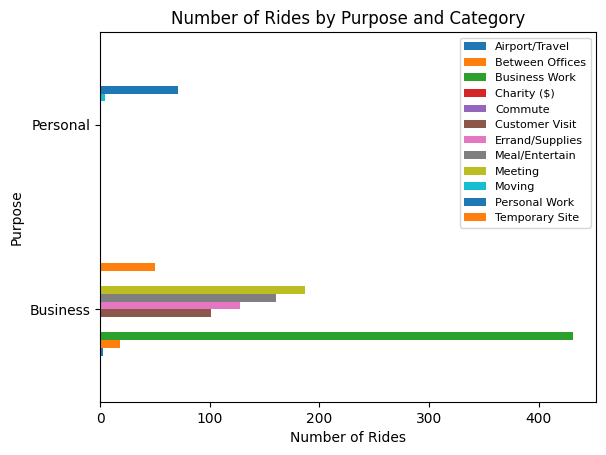

In [ ]:
purpose_by_category.plot(kind='barh')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.title('Number of Rides by Purpose and Category')
plt.legend(fontsize = 8)
plt.show()

### Monthly Trip Trends

**Date Parsing and Feature Extraction:**
The `START_DATE` and `END_DATE` columns are converted to datetime objects using `format='mixed'` to handle inconsistent formats (e.g., dd/mm/yyyy and mm/dd/yyyy). We then extract the month component from `START_DATE` to support monthly trend analysis.



In [ ]:
# Convert START_DATE and END_DATE columns to datetime format, handling mixed date formats

df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='mixed', dayfirst=True)
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='mixed', dayfirst=True)

# Extracting the month from 'START_DATE' and creating a new column 'MONTH' for monthly trend analysis

df['MONTH'] = df['START_DATE'].dt.month

# Displaying the 'MONTH' column to verify the extraction
df['MONTH']

,MONTH
0,1
1,2
2,2
3,5
4,6
...,...
1150,12
1151,12
1152,12
1153,12


Monthly Trip Frequency Analysis
This bar chart visualizes the number of Uber trips occurring in each calendar month. By analyzing trip volume on a monthly basis, we can detect seasonal trends, identify peak travel months, and inform business decisions like resource allocation or surge pricing strategies.

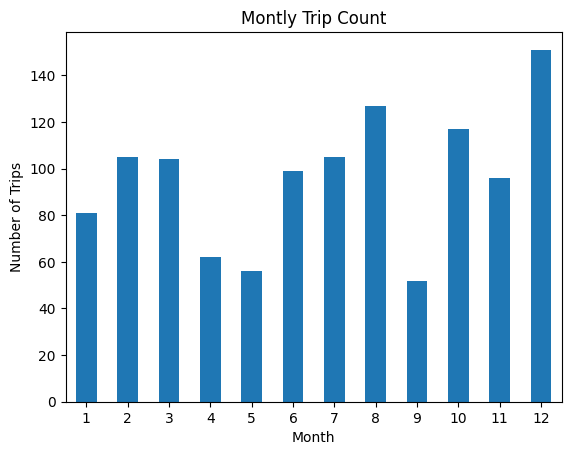

In [ ]:
# Visualizing the monthly trip count

monthly_trip_count = df['MONTH'].value_counts().sort_index()

# Plotting a bar chart for monthly trip count
monthly_trip_count.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Montly Trip Count")
plt.xticks(rotation=0)
plt.show()

### Average Miles per Purpose

This metric reveals how far people typically travel for different purposes. The median is used instead of the mean to avoid the influence of extreme outliers (e.g., a rare 800-mile ride). Understanding the median distance per purpose helps identify whether certain trip types (like airport rides or client visits) involve longer travel.

In [ ]:
# Calculate the median trip distance (in miles) for each travel purpose

avg_purpose_miles = df.groupby('PURPOSE')['MILES'].median()

avg_purpose_miles

,MILES
PURPOSE,
Airport/Travel,4.80
Between Offices,11.60
Business Work,5.20
Charity ($),15.10
Commute,180.20
Customer Visit,7.90
Errand/Supplies,3.10
Meal/Entertain,4.25
Meeting,10.00


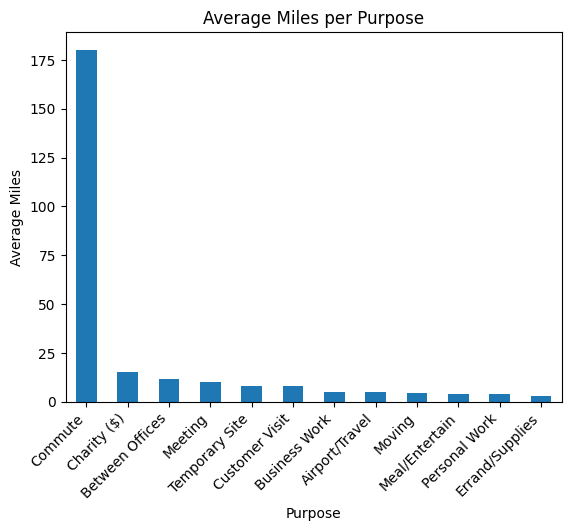

In [ ]:
# Plotting the average miles per purpose

avg_purpose_miles.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Purpose")
plt.ylabel("Average Miles")
plt.title("Average Miles per Purpose")
plt.xticks(rotation=45, ha='right')
plt.show()

## ADVANCED DATA CLEANING

Trip Duration Calculation and Data Reordering

This section calculates the duration of each trip by combining the start/end date and time columns into full datetime objects. The resulting `TRIP_DURATION` column is formatted and positioned appropriately for easier readability. This metric is crucial for analyzing average ride times, identifying long-haul trips, and comparing durations across purposes or categories.

In [ ]:
df['START_TIME'].value_counts() # Checking the frequency of each start time

,count
START_TIME,
17:50,6
13:24,5
17:27,5
14:42,5
15:19,5
...,...
11:56,1
08:55,1
15:08,1


In [ ]:
df['END_TIME'].value_counts() # Checking the frequency of each end time

,count
END_TIME,
15:03,6
17:02,6
18:47,5
17:24,5
12:24,5
...,...
21:17,1
1:06,1
12:46,1


In [ ]:
# Combine the date columns with time columns to create full datetime objects
start_datetime = pd.to_datetime(df['START_DATE'].astype(str) + ' ' + df['START_TIME'].astype(str))
end_datetime = pd.to_datetime(df['END_DATE'].astype(str) + ' ' + df['END_TIME'].astype(str))

# Calculate duration
df['TRIP_DURATION'] = end_datetime - start_datetime

In [ ]:
df.head(1)

,START_DATE,END_DATE,START_TIME,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE,MONTH,TRIP_DURATION
0,2016-01-01,2016-01-01,21:11,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,0 days 00:06:00


In [ ]:
# Converting  duration to string and extract just the HH:MM:SS part

df[['TRIP_DURATION_temp', 'TRIP_DURATION_1', 'TRIP_DURATION']] = df['TRIP_DURATION'].astype(str).str.split(' ', expand=True)

In [ ]:
# Dropping the temporary columns used for splitting

df.drop(columns=['TRIP_DURATION_temp', 'TRIP_DURATION_1'], inplace=True)

In [ ]:
# Reordering the columns for better readability

new_order = ['START_DATE', 'END_DATE', 'START_TIME', 'END_TIME', 'TRIP_DURATION', 'CATEGORY',	'START', 'STOP', 'MILES', 'PURPOSE']

df = df[new_order]

In [ ]:
df.head()  # Displaying the final cleaned DataFrame

,START_DATE,END_DATE,START_TIME,END_TIME,TRIP_DURATION,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,2016-01-01,21:11,21:17,00:06:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01,2016-02-01,01:25,01:37,00:12:00,Business,Fort Pierce,Fort Pierce,5.0,Business Work
2,2016-02-01,2016-02-01,20:25,20:38,00:13:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01,2016-05-01,17:31,17:45,00:14:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01,2016-06-01,14:42,15:49,01:07:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Distribution of Longer and Shorter Trip Durations

Trip Duration Distribution and Key Insights
The following analysis explores the distribution of trip durations across the dataset. Two line plots show the 50 most frequent shorter and longer durations, based on HH:MM:SS format. We also compute the share of rides that are under 10 minutes — a key insight into short-distance ride patterns.

In [ ]:
# Ensuring trip duration is in timedelta format

df['TRIP_DURATION'] = pd.to_timedelta(df['TRIP_DURATION'])

/tmp/ipython-input-237-2594621928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRIP_DURATION'] = pd.to_timedelta(df['TRIP_DURATION'])


In [ ]:
# Convert trip duration to minutes

df['duration_minutes'] = df['TRIP_DURATION'].dt.total_seconds() / 60

In [ ]:
# Get the 50 most frequent short and long durations (in minutes)

short_trip_duration = df['duration_minutes'].round().value_counts().sort_index().head(50)
long_trip_duration = df['duration_minutes'].round().value_counts().sort_index(ascending=False).head(50)

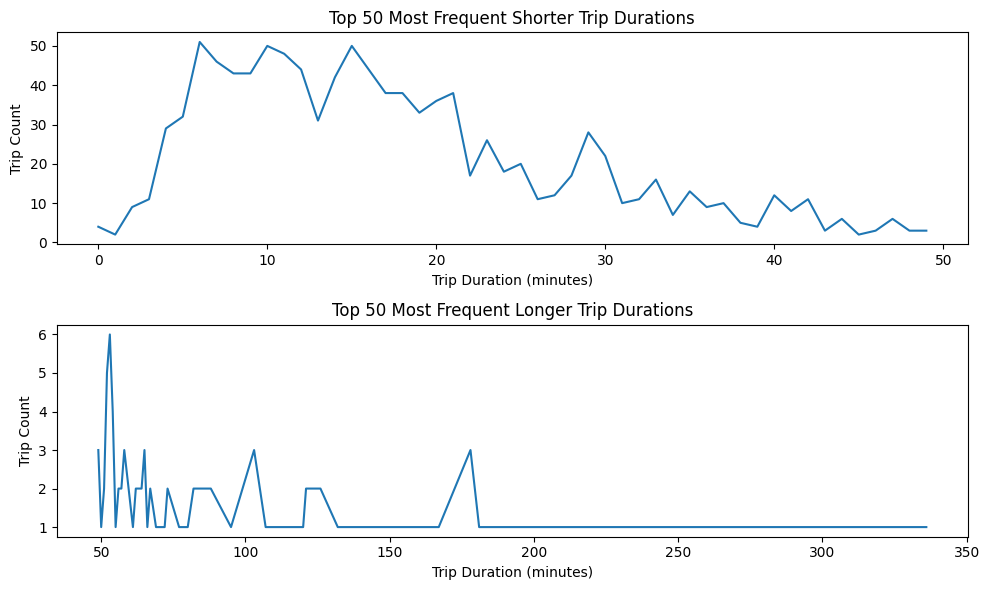

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))  # Plotting the distributions of short and long trip durations

short_trip_duration.plot(kind='line', ax=ax[0])
ax[0].set_xlabel('Trip Duration (minutes)')
ax[0].set_ylabel('Trip Count')
ax[0].set_title('Top 50 Most Frequent Shorter Trip Durations')

long_trip_duration.plot(kind='line', ax=ax[1])
ax[1].set_xlabel('Trip Duration (minutes)')
ax[1].set_ylabel('Trip Count')
ax[1].set_title('Top 50 Most Frequent Longer Trip Durations')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# What percentage of trips are under or equal to 10 minutes?
percentage_under_10min = (df['duration_minutes'] <= 10).mean() * 100

percentage_under_10min

np.float64(27.705627705627705)

Approximately **27.7%** of all trips are completed within 10 minutes or less.
This suggests that over one-quarter of Uber rides in this dataset serve short-distance transportation, potentially including last-mile connectivity, errands, or short business hops.